# DL experiment tracking using Wandb.


In [1]:
# Importing libraries.
# Importing libraries.
import os
import wandb
import torch
from datetime import datetime
from dotenv import load_dotenv
from trainer.misc import net, data, train, test, utils, config
load_dotenv()

True

## Part 1 - Wandb personal account.

In [2]:
# Setting the environment variables so as to  access personal Wandb account.
os.environ["WANDB_BASE_URL"] = os.getenv("WANDB_BASE_URL", '')
os.environ["WANDB_API_KEY"] = os.getenv("WANDB_API_KEY", '')
os.environ["WANDB_NOTEBOOK_NAME"] = os.getenv("WANDB_NOTEBOOK_NAME", '')

In [3]:
# Login into Wandb.
wandb.login()

wandb: Currently logged in as: nikhilkb98 (use `wandb login --relogin` to force relogin)


True

In [4]:
# Define attributes makeup.
def make(config):
    os.environ['TORCH_HOME'] = config.model_dir
    DEVICE = torch.device(config.device)
    _data = data.Data(data_dir=config.data_dir, train_batch_size=config.train_batch_size, test_batch_size=config.test_batch_size)
    TRAIN_LOADER, TEST_LOADER = _data.get_loaders()
    MODEL = net.Resnet18().get_model(num_classes=config.num_classes).to(DEVICE)
    OPTIMIZER = torch.optim.SGD(MODEL.parameters(), lr=config.lr, momentum=config.momentum)
    CRITERION = torch.nn.CrossEntropyLoss()
    SCHEDULER = torch.optim.lr_scheduler.ReduceLROnPlateau(OPTIMIZER, 'min', patience=config.patience)
    return MODEL, TRAIN_LOADER, TEST_LOADER, OPTIMIZER, CRITERION, SCHEDULER

In [5]:
# Train the model. 
def train_model(model=None, train_loader=None, optimizer=None, criterion=None, scheduler=None, epochs=None, device=None, save_path_dir=None, verbose=None, verbose_step=None, wandb_needed=True):
    train_loss, saved_path = train.Train(
        model=model,
        train_loader=train_loader,
        optimizer=optimizer,
        criterion=criterion,
        scheduler=scheduler,
        epochs=epochs,
        device=device,
        save_path_dir=save_path_dir,
        verbose=verbose,
        verbose_step=verbose_step,
        wandb_needed=wandb_needed
    ).train()
    return train_loss, saved_path

In [6]:
# Test the model.
def test_model(model=None, test_loader=None, device=None, save_path=None, test_run=None, config_save_model_path=None, wandb_needed=True):
    image_set, label_set, pred_set, model = test.Test(
        model=model,
        test_loader=test_loader,
        device=device,
        save_path=save_path,
        test_run=test_run,
        wandb_needed=wandb_needed
    ).test(config_save_model_path=config_save_model_path)
    utils.plot_output(image_set, label_set, pred_set, wandb_needed=True, wandb_title="Model Inference")

In [7]:
# Define model pipeline.
def model_pipeline(config=None):
    TIMESTAMP = datetime.now().strftime("%Y%m%d%H%M%S")
    # Initialize wandb to get started.
    with wandb.init(project=os.getenv("PROJECT_NAME", ''), config=config, name=f"flower_classification_run_{TIMESTAMP}"):
        config = wandb.config
        MODEL, TRAIN_LOADER, TEST_LOADER, OPTIMIZER, CRITERION, SCHEDULER = make(config)
        _, save_path = train_model(model=MODEL, train_loader=TRAIN_LOADER, optimizer=OPTIMIZER, criterion=CRITERION, scheduler=SCHEDULER, epochs=config.epochs, device=config.device, save_path_dir=config.save_path_dir, verbose=config.verbose, verbose_step=config.verbose_step)
        model_name = save_path.split('/')[-1]
        onnx_name = model_name.split('.')[0]
        test_model(model=MODEL, test_loader=TEST_LOADER, device=config.device, save_path=save_path, test_run=config.test_run, config_save_model_path=config.save_path_dir + onnx_name + ".onnx")
    return MODEL

/home/tyche/miniconda3/envs/ai/lib/python3.8/site-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "



DEVICE - cuda || EPOCHS - 10 || LEARNING RATE - 0.001.


EPOCH - 1/10 || START AT - 17:25:35 30|06|2021 || LEARNING RATE - 0.001



/home/tyche/miniconda3/envs/ai/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


	EPOCH - 1/10 || TRAIN LOSS - 0.96368 || TIME ELAPSED - 22.91s.


EPOCH - 2/10 || START AT - 17:25:58 30|06|2021 || LEARNING RATE - 0.001

	EPOCH - 2/10 || TRAIN LOSS - 0.39586 || TIME ELAPSED - 23.97s.


EPOCH - 3/10 || START AT - 17:26:22 30|06|2021 || LEARNING RATE - 0.001

	EPOCH - 3/10 || TRAIN LOSS - 0.22999 || TIME ELAPSED - 23.44s.


EPOCH - 4/10 || START AT - 17:26:46 30|06|2021 || LEARNING RATE - 0.001

	EPOCH - 4/10 || TRAIN LOSS - 0.11743 || TIME ELAPSED - 23.10s.


EPOCH - 5/10 || START AT - 17:27:09 30|06|2021 || LEARNING RATE - 0.001

	EPOCH - 5/10 || TRAIN LOSS - 0.07706 || TIME ELAPSED - 22.15s.


EPOCH - 6/10 || START AT - 17:27:31 30|06|2021 || LEARNING RATE - 0.001

	EPOCH - 6/10 || TRAIN LOSS - 0.05494 || TIME ELAPSED - 22.66s.


EPOCH - 7/10 || START AT - 17:27:54 30|06|2021 || LEARNING RATE - 0.001

	EPOCH - 7/10 || TRAIN LOSS - 0.03914 || TIME ELAPSED - 22.36s.


EPOCH - 8/10 || START AT - 17:28:16 30|06|2021 || LEARNING RATE - 0.001

	EPOCH - 8/10 || TRAIN LOSS

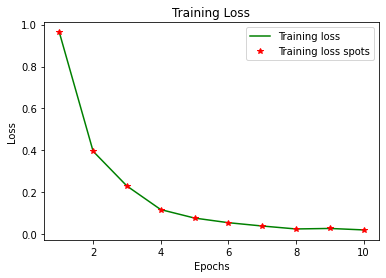

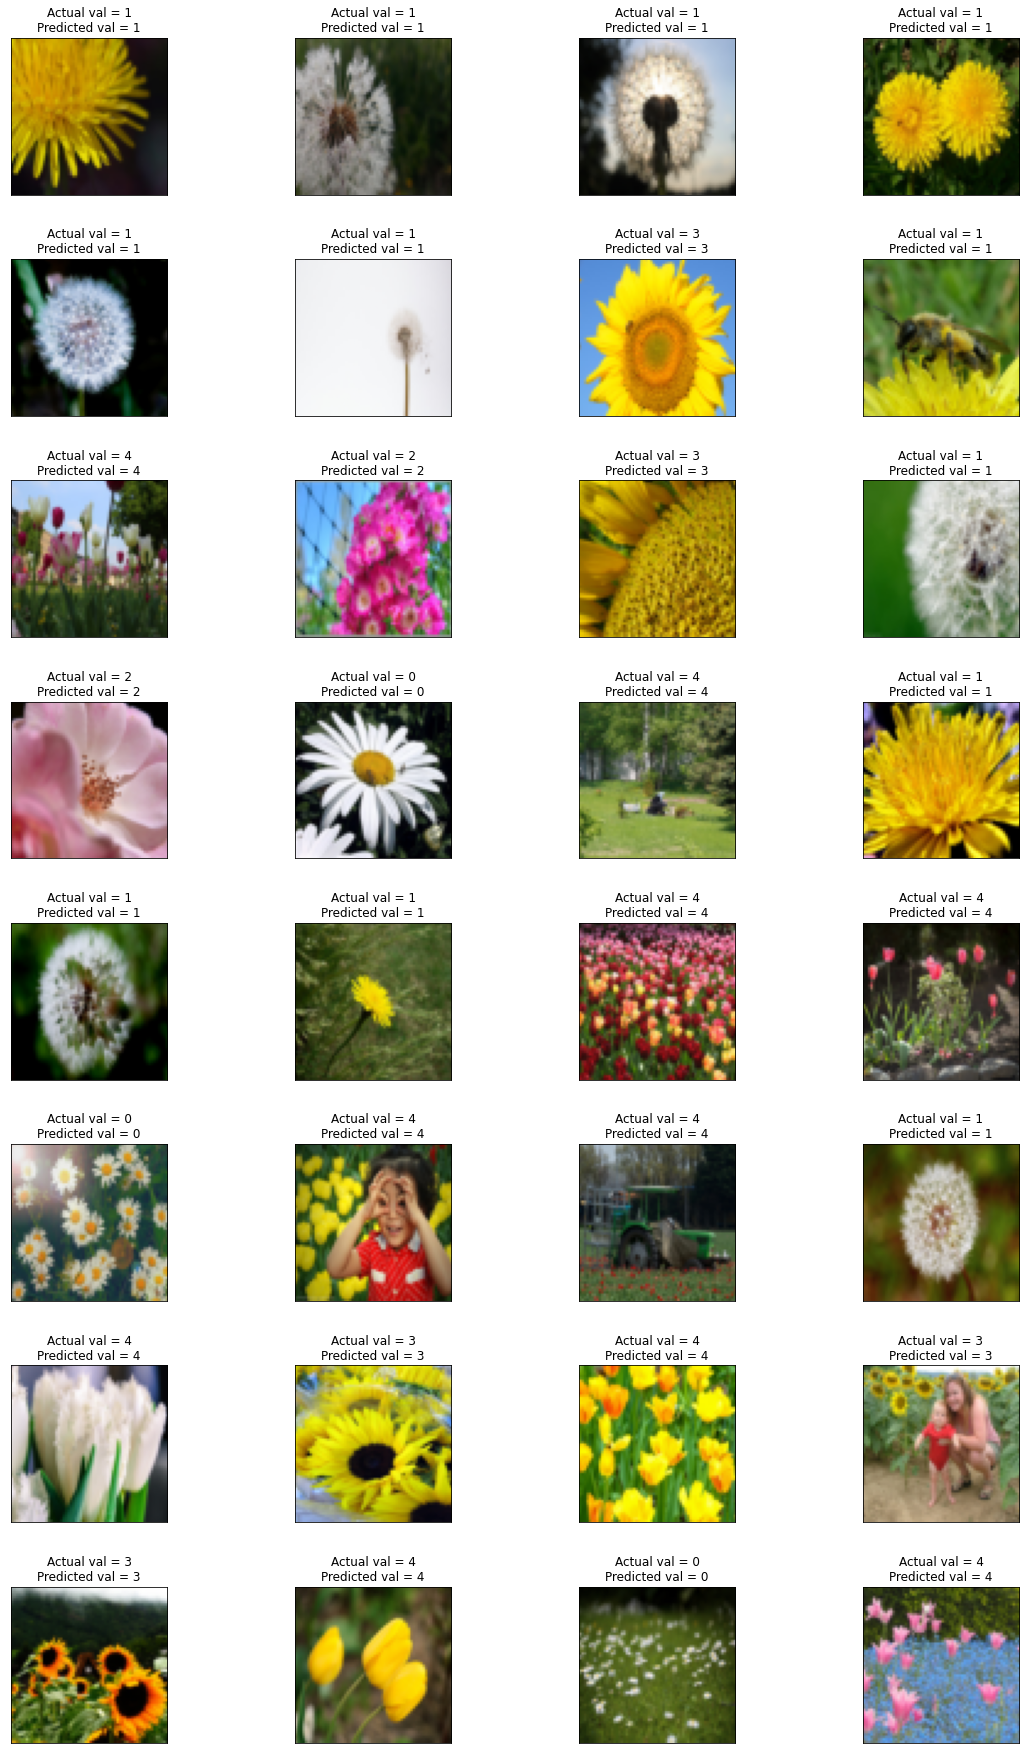

_runtime,241
_timestamp,1625054368
_step,11
Training Loss,0.0205


_runtime,▁▂▃▃▄▅▆▆▇███
_timestamp,▁▂▃▃▄▅▆▆▇███
_step,▁▂▂▃▄▄▅▅▆▇▇█
Training Loss,█▄▃▂▁▁▁▁▁▁


In [8]:
__model__ = model_pipeline(config=config.config)